<a href="https://colab.research.google.com/github/LiuChen-5749342/Foundations-of-Finance/blob/main/Coding/workshop_equities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python Workshop 1: Equities, Returns, and Portfolios


In [ ]:
# Import libraries
import pandas as pd # data frames
import numpy as np # numerical computing
import matplotlib.pyplot as plt # plotting
from pathlib import Path # path management

In [ ]:
# Define project directories
#path_project = Path.cwd().parent # For local machine
path_project = Path("/content/") # for Google Colab
path_code = path_project / "code/"
path_input = path_project / "input/"
path_output = path_project / "output/"

print(f"path_project: {path_project}")
print(f"path_code: {path_code}")
print(f"path_input: {path_input}")
print(f"path_output: {path_output}")

path_project: /content
path_code: /content/code
path_input: /content/input
path_output: /content/output


In [ ]:
# Import CRSP monthly data subset
crsp_subset = pd.read_csv(path_input / '/content/crsp_monthly_workshop.csv')

In [ ]:
# Print data frame
crsp_subset

,permno,date,tsymbol,comnam,prc,ret,vol,shrout
0,11308,2009-12-31,KO,COCA COLA CO,57.00000,-0.003497,1928924.0,2317181.0
1,11308,2010-01-29,KO,COCA COLA CO,54.25000,-0.048246,1927039.0,2317181.0
2,11308,2010-02-26,KO,COCA COLA CO,52.72000,-0.028203,2290196.0,2305124.0
3,11308,2010-03-31,KO,COCA COLA CO,55.00000,0.051593,2678707.0,2305124.0
4,11308,2010-04-30,KO,COCA COLA CO,53.45000,-0.028182,2219286.0,2307051.0
...,...,...,...,...,...,...,...,...
902,86580,2024-08-30,NVDA,NVIDIA CORP,119.37000,0.020082,80756836.0,24530000.0
903,86580,2024-09-30,NVDA,NVIDIA CORP,121.44000,0.017425,62413372.0,24530000.0
904,86580,2024-10-31,NVDA,NVIDIA CORP,132.75999,0.093215,56028888.0,24508000.0
905,86580,2024-11-29,NVDA,NVIDIA CORP,138.25000,0.041353,44805933.0,24490000.0


### Clean data

In [ ]:
# Convert date to datetime format
crsp_subset['date'] = pd.to_datetime(crsp_subset['date'])

In [ ]:
# Clean price and return columns
crsp_subset['prc'] = crsp_subset['prc'].abs()
crsp_subset['ret'] = pd.to_numeric(crsp_subset['ret'], errors='coerce')

In [ ]:
# Compute market capitalization
crsp_subset['mktcap'] = crsp_subset['prc'] * crsp_subset['shrout'] / 1e6  # in billions

In [ ]:
# Get unique permnos
permno_subset = crsp_subset['permno'].unique()

In [ ]:
permno_subset

array([11308, 14593, 19561, 84262, 86580])

In [ ]:
crsp_subset

,permno,date,tsymbol,comnam,prc,ret,vol,shrout,mktcap
0,11308,2009-12-31,KO,COCA COLA CO,57.00000,-0.003497,1928924.0,2317181.0,132.079317
1,11308,2010-01-29,KO,COCA COLA CO,54.25000,-0.048246,1927039.0,2317181.0,125.707069
2,11308,2010-02-26,KO,COCA COLA CO,52.72000,-0.028203,2290196.0,2305124.0,121.526137
3,11308,2010-03-31,KO,COCA COLA CO,55.00000,0.051593,2678707.0,2305124.0,126.781820
4,11308,2010-04-30,KO,COCA COLA CO,53.45000,-0.028182,2219286.0,2307051.0,123.311876
...,...,...,...,...,...,...,...,...,...
902,86580,2024-08-30,NVDA,NVIDIA CORP,119.37000,0.020082,80756836.0,24530000.0,2928.146100
903,86580,2024-09-30,NVDA,NVIDIA CORP,121.44000,0.017425,62413372.0,24530000.0,2978.923200
904,86580,2024-10-31,NVDA,NVIDIA CORP,132.75999,0.093215,56028888.0,24508000.0,3253.681835
905,86580,2024-11-29,NVDA,NVIDIA CORP,138.25000,0.041353,44805933.0,24490000.0,3385.742500


Plot time series of:
- stock prices
- market capitalisation
- monthly returns
- cumulative returns

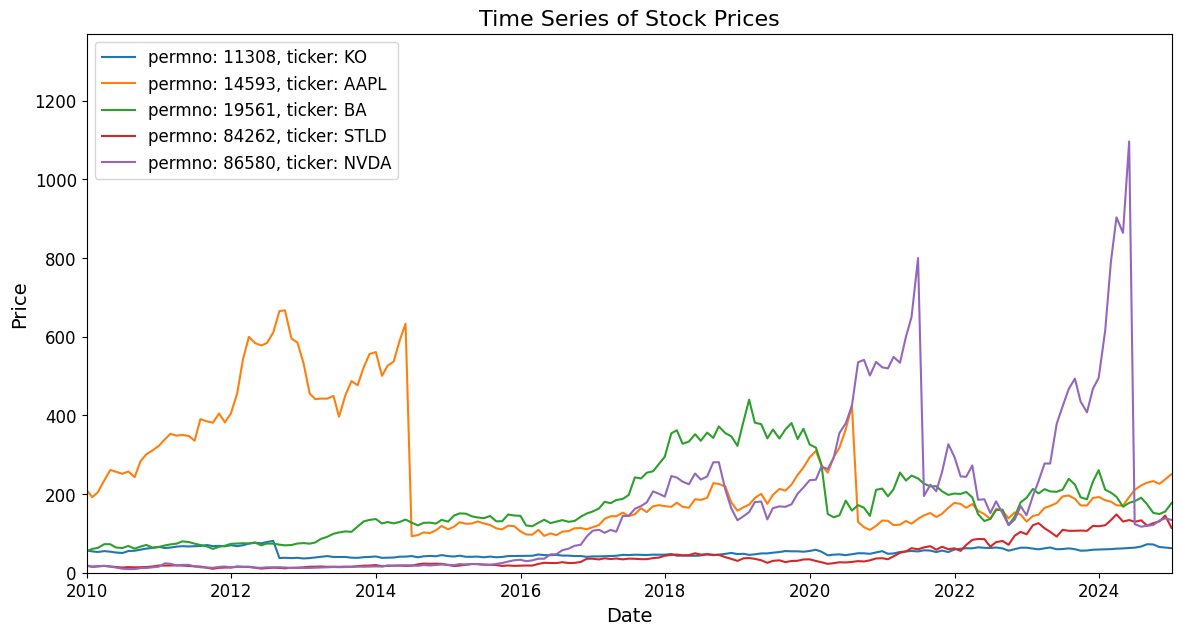

In [ ]:
# Plot time series of stock prices for each selected company
plt.figure(figsize=(14, 7))
for permno in permno_subset:
    tsymbol = crsp_subset[crsp_subset['permno'] == permno]['tsymbol'].values[-1]
    subset = crsp_subset[crsp_subset['permno'] == permno]
    plt.plot(subset['date'], subset['prc'], label=f"permno: {permno}, ticker: {tsymbol}")
plt.title("Time Series of Stock Prices", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.xlim(crsp_subset['date'].min(), crsp_subset['date'].max())
plt.ylim(0, crsp_subset['prc'].max() * 1.25)
plt.show()

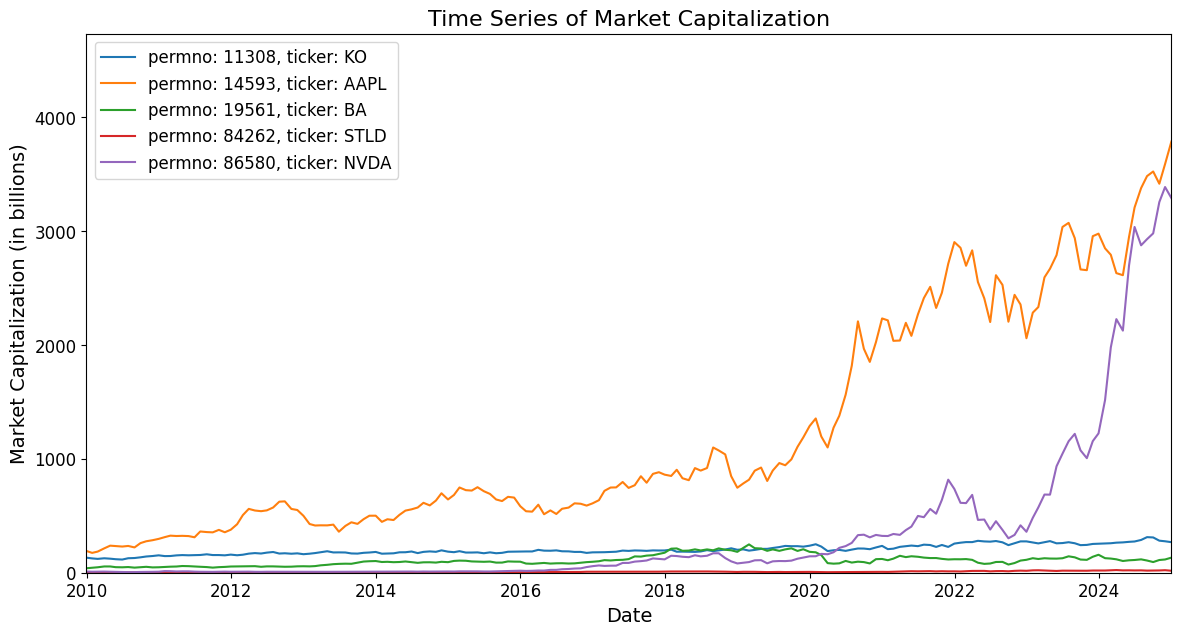

In [ ]:
# Plot time series of market capitalization for each selected company
plt.figure(figsize=(14, 7))
for permno in permno_subset:
    tsymbol = crsp_subset[crsp_subset['permno'] == permno]['tsymbol'].values[-1]
    subset = crsp_subset[crsp_subset['permno'] == permno]
    plt.plot(subset['date'], subset['mktcap'], label=f"permno: {permno}, ticker: {tsymbol}")
plt.title("Time Series of Market Capitalization", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Market Capitalization (in billions)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc="upper left")
plt.xlim(crsp_subset['date'].min(), crsp_subset['date'].max())
plt.ylim(0, crsp_subset['mktcap'].max() * 1.25)
plt.show()

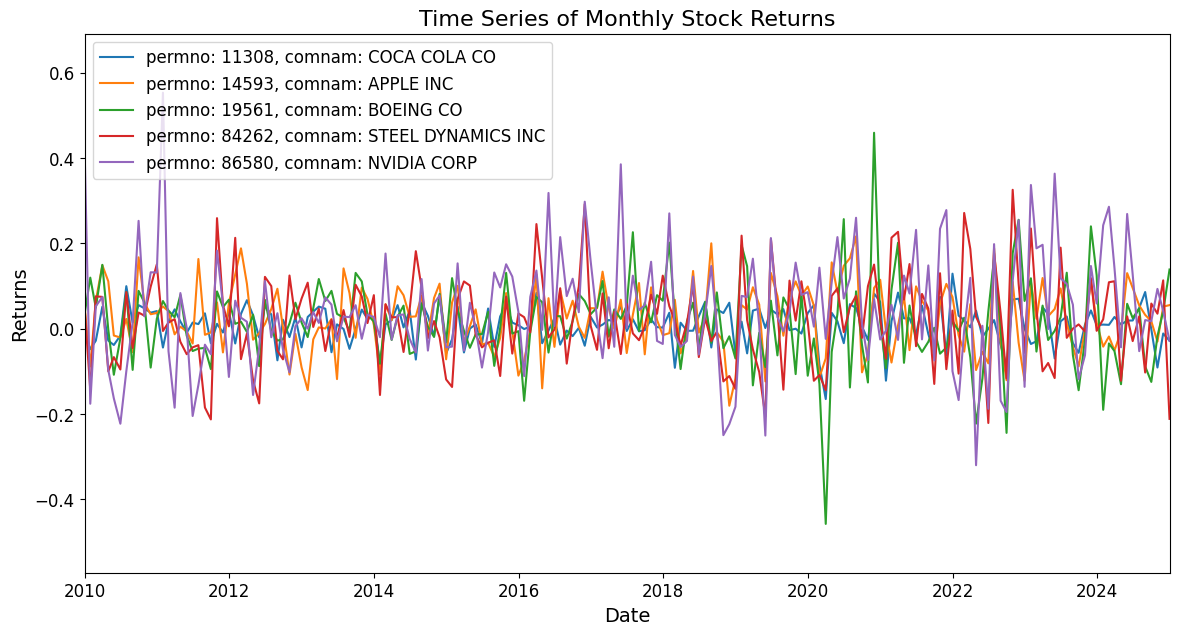

In [ ]:
# Plot time series of monthly stock returns for each selected company
plt.figure(figsize=(14, 7))
for permno in permno_subset:
    subset = crsp_subset[crsp_subset['permno'] == permno]
    plt.plot(subset['date'], subset['ret'], label=f"permno: {permno}, comnam: {crsp_subset[crsp_subset['permno'] == permno]['comnam'].values[-1]}")
plt.title("Time Series of Monthly Stock Returns", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Returns", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(crsp_subset['date'].min(), crsp_subset['date'].max())
plt.ylim(crsp_subset['ret'].min() * 1.25, crsp_subset['ret'].max() * 1.25)
plt.legend(fontsize=12, loc="upper left")
plt.show()

In [ ]:
# Compute cumulative returns for each company
# - compute gross returns
crsp_subset['gross_ret'] = (1 + crsp_subset['ret'].fillna(0))
# - ensure that data is sorted by permno and date
crsp_subset = crsp_subset.sort_values(by=['permno', 'date'])
# - set the first observation to be the initial investment of 1 USD
crsp_subset.loc[crsp_subset['date'] == '2009-12-31', 'gross_ret'] = 1
# - compute cumulative returns
crsp_subset['cumul_ret'] = crsp_subset.groupby('permno')['gross_ret'].cumprod()

In [ ]:
crsp_subset

,permno,date,tsymbol,comnam,prc,ret,vol,shrout,mktcap,gross_ret,cumul_ret
0,11308,2009-12-31,KO,COCA COLA CO,57.00000,-0.003497,1928924.0,2317181.0,132.079317,1.000000,1.000000
1,11308,2010-01-29,KO,COCA COLA CO,54.25000,-0.048246,1927039.0,2317181.0,125.707069,0.951754,0.951754
2,11308,2010-02-26,KO,COCA COLA CO,52.72000,-0.028203,2290196.0,2305124.0,121.526137,0.971797,0.924912
3,11308,2010-03-31,KO,COCA COLA CO,55.00000,0.051593,2678707.0,2305124.0,126.781820,1.051593,0.972631
4,11308,2010-04-30,KO,COCA COLA CO,53.45000,-0.028182,2219286.0,2307051.0,123.311876,0.971818,0.945220
...,...,...,...,...,...,...,...,...,...,...,...
902,86580,2024-08-30,NVDA,NVIDIA CORP,119.37000,0.020082,80756836.0,24530000.0,2928.146100,1.020082,313.776034
903,86580,2024-09-30,NVDA,NVIDIA CORP,121.44000,0.017425,62413372.0,24530000.0,2978.923200,1.017425,319.243581
904,86580,2024-10-31,NVDA,NVIDIA CORP,132.75999,0.093215,56028888.0,24508000.0,3253.681835,1.093215,349.001872
905,86580,2024-11-29,NVDA,NVIDIA CORP,138.25000,0.041353,44805933.0,24490000.0,3385.742500,1.041353,363.434146


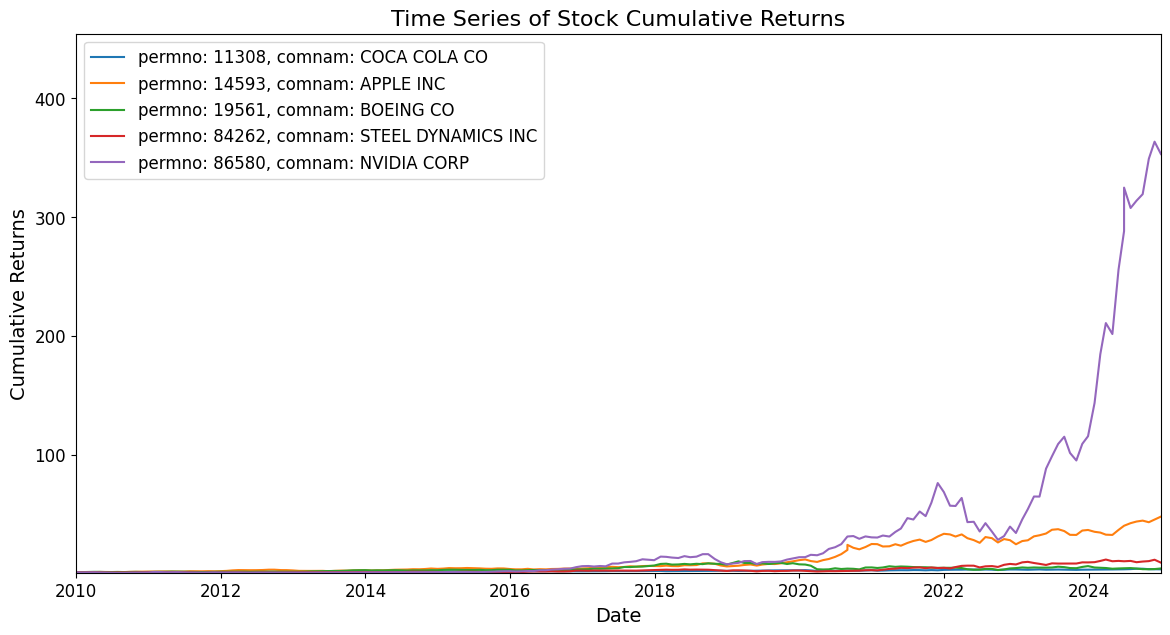

In [ ]:
# Plot time series of stock cumulative returns for each selected company
plt.figure(figsize=(14, 7))
for permno in permno_subset:
    subset = crsp_subset[crsp_subset['permno'] == permno]
    plt.plot(subset['date'], subset['cumul_ret'], label=f"permno: {permno}, comnam: {crsp_subset[crsp_subset['permno'] == permno]['comnam'].values[-1]}")
plt.title("Time Series of Stock Cumulative Returns", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Cumulative Returns", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(crsp_subset['date'].min(), crsp_subset['date'].max())
plt.ylim(crsp_subset['cumul_ret'].min() * 1.25, crsp_subset['cumul_ret'].max() * 1.25)
#plt.ylim(crsp_subset['cumul_ret'].min() * 1.25, 50) # ALTERNATIVE LIMIT TO SEE EARLY PERFORMANCE
plt.legend(fontsize=12, loc="upper left")
plt.show()

Compute descriptive statistics of monthly returns:
- historical average monthly return
- historical standard deviation of monthly return

In [ ]:
# Compute mean and standard deviation of returns for each company
return_stats = crsp_subset[crsp_subset['date'] >= "2010-01-01"].groupby('permno')['ret'].agg(['mean', 'std']).reset_index()

# Add the last comnam for each permno
last_comnam = crsp_subset.groupby('permno')['comnam'].last().reset_index()
return_stats = return_stats.merge(last_comnam, on='permno')
return_stats.columns = ['permno', 'mean_ret', 'std_ret', 'asset_name']

# Sort by standard deviation
return_stats = return_stats.sort_values(by='std_ret', ascending=True)

# Display the updated return_stats DataFrame
print(return_stats)

   permno  mean_ret   std_ret          asset_name
0   11308  0.007897  0.043869        COCA COLA CO
1   14593  0.024624  0.078653           APPLE INC
2   19561  0.012962  0.098591           BOEING CO
3   84262  0.017603  0.103878  STEEL DYNAMICS INC
4   86580  0.041150  0.131185         NVIDIA CORP


Construct portfolios:
- equally weighted
- value weighted, rebalanced monthly
Compute average historical monthly return and standard deviation of these portfolios.

In [ ]:
# Construct equally-weighted and value-weighted portfolios
# - ensure data is sorted by date and permno
crsp_subset = crsp_subset.sort_values(by=['date', 'permno'])
# - get lagged market capitalization
crsp_subset['mktcap_l1'] = crsp_subset.groupby('permno')['mktcap'].shift(1)
# - value weighted portfolio weights
crsp_subset['w_vw'] = crsp_subset['mktcap_l1'] / crsp_subset.groupby('date')['mktcap_l1'].transform('sum')
# - equally weighted portfolio weights
crsp_subset['w_ew'] = 1 / crsp_subset.groupby('date')['permno'].transform('count')

In [ ]:
# Compute returns for equally-weighted and value-weighted portfolios
crsp_subset['ret_ew'] = (crsp_subset['ret'] * crsp_subset['w_ew']).groupby(crsp_subset['date']).transform('sum')
crsp_subset['ret_vw'] = (crsp_subset['ret'] * crsp_subset['w_vw']).groupby(crsp_subset['date']).transform('sum')

In [ ]:
# Append portfolio returns to return_stats
# - subset to monthly portfolio returns
portfolio_stats = crsp_subset[crsp_subset['date'] >= "2010-01-01"].groupby('date')[['ret_ew', 'ret_vw']].first().reset_index()
# - compute mean and std dev
ew_mean = portfolio_stats['ret_ew'].mean()
ew_std = portfolio_stats['ret_ew'].std()
vw_mean = portfolio_stats['ret_vw'].mean()
vw_std = portfolio_stats['ret_vw'].std()
# - convert into DataFrame
portfolio_summary = pd.DataFrame({
    'mean_ret': [ew_mean, vw_mean],
    'std_ret': [ew_std, vw_std],
    'asset_name': ['PORTF EW', 'PORTF VW'],
})
# - concatenate along axis 0 (rows)
return_stats = pd.concat([return_stats, portfolio_summary], ignore_index=True)

In [ ]:
portfolio_summary

,mean_ret,std_ret,asset_name
0,0.020685,0.061563,PORTF EW
1,0.022269,0.065270,PORTF VW


In [ ]:
# Print monthly return statistics including portfolios
print(return_stats)

    permno  mean_ret   std_ret          asset_name
0  11308.0  0.007897  0.043869        COCA COLA CO
1  14593.0  0.024624  0.078653           APPLE INC
2  19561.0  0.012962  0.098591           BOEING CO
3  84262.0  0.017603  0.103878  STEEL DYNAMICS INC
4  86580.0  0.041150  0.131185         NVIDIA CORP
5      NaN  0.020685  0.061563            PORTF EW
6      NaN  0.022269  0.065270            PORTF VW


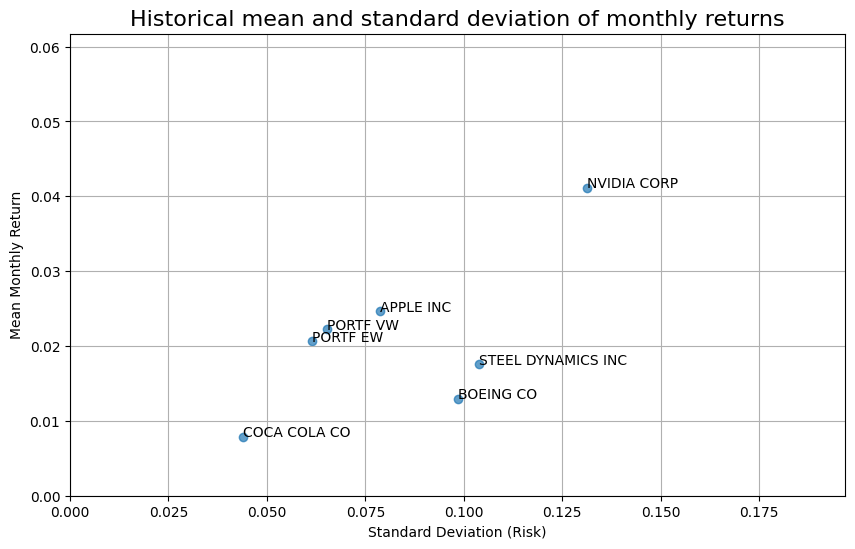

In [ ]:
# Plot assets in risk-return space
plt.figure(figsize=(10, 6))
plt.scatter(return_stats['std_ret'], return_stats['mean_ret'], alpha=0.7)
for i in range(return_stats.shape[0]):
    plt.annotate(return_stats['asset_name'].values[i], (return_stats['std_ret'].values[i], return_stats['mean_ret'].values[i]))
plt.title("Historical mean and standard deviation of monthly returns", fontsize=16)
plt.xlabel("Standard Deviation (Risk)")
plt.ylabel("Mean Monthly Return")
plt.xlim(0, return_stats['std_ret'].max() * 1.5)
plt.ylim(0, return_stats['mean_ret'].max() * 1.5)
plt.grid()
plt.show()